In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [10]:
data_dir_train = 'data/train' 
data_dir_validation = 'data/validation' 
data_dir_test = 'data/test'

In [17]:
import os
import cv2
import imghdr

image_extension = ['jpeg','jpg', 'bmp', 'png']

def check_image_extension(path):
    
    for image_class in os.listdir(path): 
        for image in os.listdir(os.path.join(path, image_class)):
            image_path = os.path.join(path, image_class, image)
            
            try: 
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_extension: 
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e: 
                print('Issue with image {}'.format(image_path), e)
                os.remove(image_path)

In [18]:
check_image_extension(data_dir_train)
check_image_extension(data_dir_validation)
check_image_extension(data_dir_test)

In [21]:
# Create an ImageDataGenerator object to normalize the pixels
data_scaled = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
train_ds = data_scaled.flow_from_directory(data_dir_train, 
                target_size=(256, 256), batch_size=64, shuffle=True, class_mode='binary')

Found 600 images belonging to 2 classes.


In [20]:
validation_ds = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_ds.flow_from_directory(
        data_dir_validation,
        shuffle=True,
        target_size=(256, 256),
        batch_size=8,
        class_mode='binary')

# # Utiliser 20% de la data pour le test
# validation_generator.samples = int(validation_generator.samples * 0.3)
# validation_generator.samples

Found 100 images belonging to 2 classes.


In [42]:
test_ds = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_ds.flow_from_directory(
        data_dir_test,
        shuffle=True,
        target_size=(256, 256),
        batch_size=8,
        class_mode='binary')


test_generator.samples = int(test_generator.samples * 0.20) + 1
test_generator.samples

Found 198 images belonging to 2 classes.


40

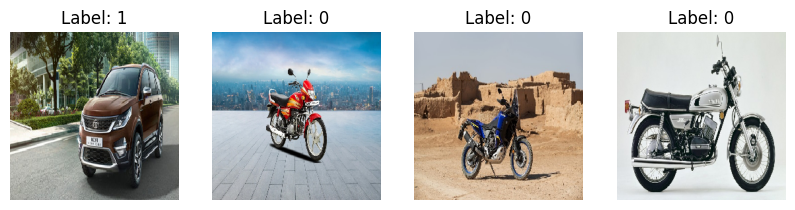

In [25]:
# Get a batch of augmented images and labels
images, labels = next(test_generator)

# Plot the images
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))
for i in range(4):
    axs[i].imshow(images[i])
    axs[i].axis('off')
    axs[i].set_title('Label: ' + str(int(labels[i])))
plt.show()

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [95]:
# We define a CNN model
# We use Conv2D, which is a convolutional neural network (CNN) layer in Keras

model = Sequential([

    Conv2D(32, (2,2), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    
    Conv2D(64, (2,2), 1, activation='relu'),
    MaxPooling2D(),
    
    Conv2D(128, (2,2), 1, activation='relu'),
    MaxPooling2D(),
    
    Flatten(),
    Dense(256, activation='relu'),
    
    Dense(1, activation='sigmoid'),

])

In [96]:
model.compile(tf.keras.optimizers.Adam(), 
              loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [34]:
hist = model.fit(train_ds, validation_data=validation_generator, epochs=20)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 1.6279 - accuracy: 0.5317

C:\Users\mfatt\OneDrive\Documents\Python Scripts\Tensorflow Introduction\CarVsBike-Classification\CarVsBike\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/10 [==============================] - 57s 5s/step - loss: 1.6279 - accuracy: 0.5317 - val_loss: 0.6987 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 54s 5s/step - loss: 0.6348 - accuracy: 0.6267 - val_loss: 0.6238 - val_accuracy: 0.7100
Epoch 3/20
10/10 [==============================] - 55s 6s/step - loss: 0.4716 - accuracy: 0.7767 - val_loss: 0.5318 - val_accuracy: 0.8100
Epoch 4/20
10/10 [==============================] - 60s 6s/step - loss: 0.3042 - accuracy: 0.8833 - val_loss: 0.5885 - val_accuracy: 0.7400
Epoch 5/20
10/10 [==============================] - 55s 5s/step - loss: 0.1733 - accuracy: 0.9533 - val_loss: 0.3718 - val_accuracy: 0.8400
Epoch 6/20
10/10 [==============================] - 41s 4s/step - loss: 0.0922 - accuracy: 0.9750 - val_loss: 0.3248 - val_accuracy: 0.8600
Epoch 7/20
10/10 [==============================] - 49s 5s/step - loss: 0.0496 - accuracy: 0.9900 - val_loss: 0.4372 - val_accuracy: 0.8500
Epoch 8/20
10/10 [=============

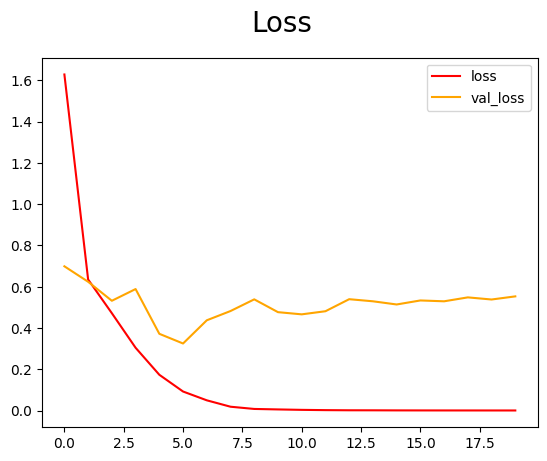

In [87]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

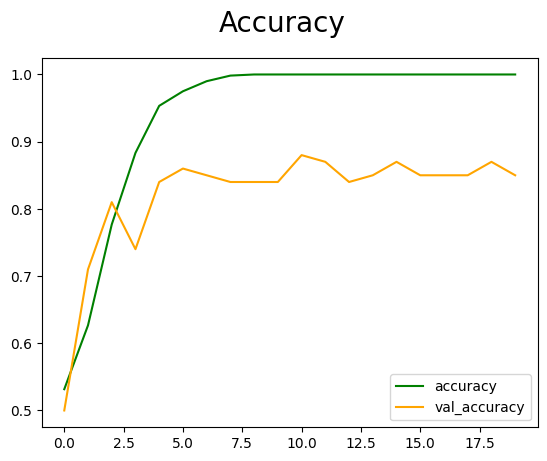

In [90]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
batch_size = 8

# Get the total number of images from the generator
num_images = test_generator.samples

# Calculation of the total number of batches in the test generator
num_batches = int(np.ceil(num_images / batch_size))

# Initialization of counters for metrics
pre.reset_states()
re.reset_states()
acc.reset_states()

# Loop to iterate on all batches of data
for i in range(num_batches):

    # Recovery of a batch of test images and their labels
    image_test, label = test_generator.next()
#     break
    
    # Loop to iterate on all images in the batch
    for j in range(batch_size):
        image = np.expand_dims(image_test[j], 0) # Adding a dimension to the image to match the expectations of the model

        yhat = model.predict(image) 
        y = label[j].reshape(1, 1) 

        # Update metrics
        pre.update_state(y, yhat)
        re.update_state(y, yhat)
        acc.update_state(y, yhat)

In [45]:
# Display the results
print('Precision :', pre.result().numpy())
print('Recall :', re.result().numpy())
print('Accuracy :', acc.result().numpy())

Precision : 0.85714287
Recall : 0.85714287
Accuracy : 0.85


In [62]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)

25/25 [==============================] - 9s 359ms/step - loss: 0.7442 - accuracy: 0.8485


In [63]:
# Display the results of the evaluation
print('Loss of test data :', test_loss)
print('Accuracy of test data :', test_acc)

Loss of test data : 0.7441540956497192
Accuracy of test data : 0.8484848737716675


In [78]:
test_set = test_generator.next()

test_images = test_set[0]
class_names = ["Bike", "Car"]

predictions = []
test_labels = []

for i in range(len(test_set[0])):
    prediction = model.predict(np.expand_dims(test_set[0][i], 0))
    predictions.append(prediction[0][0])
    test_labels.append(test_set[1][i].astype(int))

1/1 [==============================] - 0s 91ms/step


In [69]:
import matplotlib.pyplot as plt
import numpy as np

def plot_image(i, predictions_array, true_label, img, class_names):

    true_label, img = true_label[i], img[i]

    # Image display
    plt.imshow(img, cmap=plt.cm.binary)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Prediction
    predicted_label = np.argmax(predictions_array[i])
    if predicted_label == true_label:
        color = 'green'
        edgecolor = 'green'
    else:
        color = 'red'
        edgecolor = 'red'

    # Prediction and score display
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array[i]),
                                         class_names[true_label]),
                                         color=color)
    
    plt.gca().spines['bottom'].set_color(edgecolor)
    plt.gca().spines['top'].set_color(edgecolor)
    plt.gca().spines['right'].set_color(edgecolor)
    plt.gca().spines['left'].set_color(edgecolor)
    
    plt.gca().spines['bottom'].set_linewidth(3)
    plt.gca().spines['top'].set_linewidth(3)
    plt.gca().spines['right'].set_linewidth(3)
    plt.gca().spines['left'].set_linewidth(3)

def plot_value_array(i, predictions_array, true_label, class_names):

    true_label = true_label[i]

    # Displaying the bar graph
    plt.grid(False)
    plt.xticks(range(len(class_names)), class_names, rotation=45)
    plt.yticks([])
    plot = plt.bar(range(len(class_names)), predictions_array[i], color="#777777")
    plt.ylim([0, 1])

    # Colorization of the bar corresponding to the prediction and the real label
    predicted_label = np.argmax(predictions_array[i])
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('green')

In [72]:
def predictions_sum_to_one(prediction):
    predictions = [1-prediction, prediction] 
    return predictions

In [79]:
prediction_single_image = [predictions_sum_to_one(prediction[0][0])]

1/1 [==============================] - 0s 89ms/step


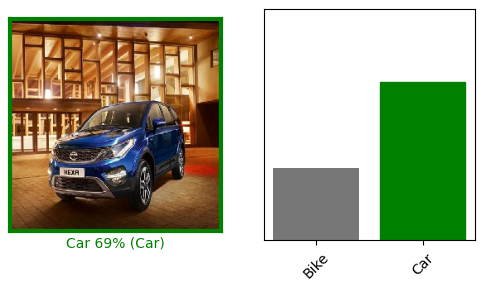

In [80]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction_single_image, test_labels, test_images, class_names)
plt.subplot(1,2,2)
plot_value_array(i, prediction_single_image,  test_labels, class_names)
plt.show()

In [ ]:
prediction = model.predict(np.expand_dims(test_set[0][0], 0))

In [81]:
prediction_array = []

for i in range(8):
    prediction_array.append(predictions_sum_to_one(predictions[i]))

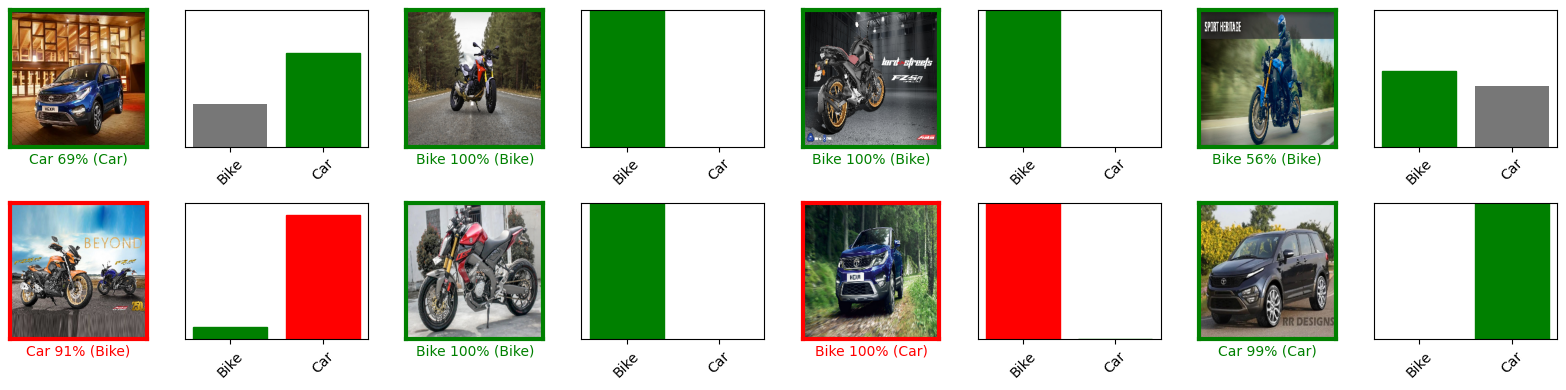

In [82]:
# Prediction for a batch of eight images
# run 'test_set = test_generator.next()' above to get a new batch of images

num_rows = 2
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction_array, test_labels, test_images, class_names)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction_array, test_labels, class_names)
plt.tight_layout()
plt.show()